# ORIE 5355/INFO 5370 HW 3: Algorithmic Pricing

 - Name:Fabio Deo
 - Net-id: fd232
 - Date: 10/20/2022
 - Late days used for this assignment: 2 
 - Total late days used (counting this assignment): 3
 - People with whom you discussed this assignment: 

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/N2hdk8B4r7TF1RDG6 and include the survey completion code below.

### Question 0 [1 point]
<font color='blue'> Survey completion code: hw3_2021xyz

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2021/assignments/). 

# Conceptual component [4 points]

Please complete the following pricing ethics scenario questionaire: https://forms.gle/dLq7mC32ft1NrhK69, and include the survey completion code below. **We will discuss these issues in class most likely on 10/5 (Exact date to be announced). You must complete the questionaire before the day of that class, even if you turn in the rest of the homework later. The questionaire will close the morning of the class that we discuss these issues.**

<font color='blue'> Survey completion code: Submitted but lost completion code!

Fabio Deo (fd232@cornell.edu) - Submitted Oct 5 at 12:33AM

<font color='blue'> Survey completion code: Based on the first letter of your first name, explain your answers to the following questions, in at most three sentences each.

First letter A-C: 1, 6, 11, 16

First letter D-H: 2, 7, 12, 17

First letter I-M: 3, 8, 13, 18

First letter N-S: 4, 9, 14, 19

First letter T-Z: 5, 10, 15, 20


<font color='blue'> Be prepared to discuss your answers to at least these questions in class (I might randomly call on people), but you should also be willing/able to discuss your answers to other questions. 

#### q2. A convenience store has been selling umbrellas for 5 dollars. Whenever it starts raining, the store raises the price to 8.
_Answer: Completely Fair_

I believe this pricing strategy is completely fair since when it rains the demand for the product is higher and therefore the store owner can naturally leverage the context to increase the price. The umbrella is not an essential item and the price increase of 60% is not that big to justify any accusation of it being an unethical pricing strategy.

#### q7 A small factory produces tables and sells all that it can make at 200 dollars each. Because of changes in the price of materials, the cost of making each table has recently decreased by 40. The factory reduces its price for the tables by only 20 dollars.
_Answer: Completely Fair_

I believe this pricing strategy is completely fair since I don't think that a drop in manifacturing costs has to automatically result in the same price reduction. To keep the gain the same mathematically, the factory should recompute the new price using the new manifacturing cost while keeping the same profit percentage. However, if the market price does not adjust to the lower costs of materials, it is completely fair for the factory to leverage this to increase their profits by simply keeping their price the same.

#### q12. A business in a community with high unemployment needs to hire a new computer programmer. Four candidates are judged to be completely qualified for the job. The manager asks the candidates to state the lowest salary they would be willing to accept, and then hires the one who demands the lowest salary. 
_Answer: Acceptable_

I think that, while the employer has the right to use such a hiring strategy, this method is not completely right from an ethical standpoint. This is because using such a strategy on the long run will eventually influence future applicants who have spotted this pattern to shoot for lower salaries hoping to be the "lowest bidding". This creates a vicious circle that progressively drives the salaries lower.

#### q17. On Uber/Lyft, drivers have to drive longer to pick up the passengers in certain suburbs or neighborhoods,  because they tend to be farther away. Is it acceptable for them to charge more to passengers from these neighborhoods?
_Answer: Acceptable_

I was unsure between "acceptable" and "completely fair" for this pricing stategy. I finally decided that is only acceptable, since I think that the completely fair strategy would be to partially increase the price and partially increase the driver salary, such that both customer and company equally contribute to the driver's income. However, the strategy is by all means ethically acceptable for me, as long as the customers from far neighborhoods are willing to pay higher prices for it.

# Programming component

## Helper code

In [199]:
import numpy as np
import pandas as pd
import os, sys, math
import matplotlib.pyplot as plt

In [200]:
df_train = pd.read_csv('data/HW3_data_train.csv')
test_demand_curve = pd.read_csv('data/test_demand.csv')

In [201]:
df_train.head()

,Location,Income,Offered price,Purchased
0,Africa,10.38,3.16,False
1,Europe,26.33,3.47,True
2,Europe,24.06,3.78,True
3,Africa,16.18,3.74,False
4,Asia Pacific,13.73,4.75,False


In [202]:
df_train.shape, test_demand_curve.shape

((4000, 4), (199, 5))

## Problem 1: Demand estimation and pricing without covariates

First, we will use the training data to construct estimates of the demand at each price without leveraging the covariates, and then use that estimated function to calculate optimal prices. 

In [203]:
from IPython.display import display_html
from itertools import chain,cycle

def display_sbs(*args,titles = cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str += '<th style="text-align:center"><td style="vertical-align:top">'
        html_str += f'<h4 style="text-align: center; padding-bottom: 10px">{title}</h4>'
        html_str += df.to_html().replace('table','table style="display:inline"')
        html_str += '</td></th>'
    display_html(html_str,raw=True)

In [204]:
import matplotlib.pyplot as plt

def plot_demand_curves(xs, ys, test_curve, ax,
                       labels = cycle(['']), title = "", xlab = "", ylab = ""):    
    
    # Plot true curve
    ax.plot(test_curve["Price_bin_mid"], test_curve["Demand_at_price"], 
            label = "True Curve", linewidth = 3, linestyle = '--')
    
    for x, y, l in zip(xs, ys, labels):
        ax.plot(x, y, label = l)
    
    
    # Set labels, title and legend
    ax.set_xlabel(xlab,  fontsize = 16)
    ax.set_ylabel(ylab,  fontsize = 16)
    ax.set_title(title,  fontsize = 20, fontweight="bold")
    ax.legend(fontsize = 16)

### 1a) Naive method: empirical estimate of demand $d(p)$ at each price

<font color='blue'> Fill in the below function, that takes in a dataframe and the number of bins into which to separate the historical prices. The function should output a dataframe that has one row for each price bin, with two columns: the bin interval, and the estimated demand $d(p)$ (the fraction of potential customers who purchase at price $p$) in that bin.  
    
Use the following function to create bins:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [205]:
# Example with 10 bins:
df_train['bin_with_10_bins'] = pd.qcut(df_train['Offered price'], 10)
df_train.head()

,Location,Income,Offered price,Purchased,bin_with_10_bins
0,Africa,10.38,3.16,False,"(2.95, 3.54]"
1,Europe,26.33,3.47,True,"(2.95, 3.54]"
2,Europe,24.06,3.78,True,"(3.54, 4.19]"
3,Africa,16.18,3.74,False,"(3.54, 4.19]"
4,Asia Pacific,13.73,4.75,False,"(4.19, 4.77]"


For example, with 2 bins and passing in df_train to the function, you should see the following output:

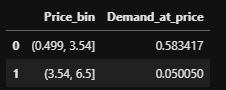

In [206]:
def create_empirical_estimate_demand_df(df, number_of_pricing_bins):
    df_tmp = df.copy()
    df_tmp['Price_bin'] = pd.qcut(df_tmp['Offered price'], number_of_pricing_bins)
    df_tmp = df_tmp.groupby('Price_bin')['Purchased'].apply(
        lambda x: round((x == True).sum() / (x == x).sum(), 6)) \
                 .reset_index(name='Demand_at_price')

    return pd.DataFrame(df_tmp[['Price_bin', 'Demand_at_price']])


In [207]:
df_2bins = create_empirical_estimate_demand_df(df_train, 2)
display_sbs(df_2bins, titles = ['Train Demand at price (2 bins)'])

,Price_bin,Demand_at_price
0,"(0.499, 3.54]",0.583417
1,"(3.54, 6.5]",0.050050


<font color='blue'> Fill in the below function, that takes in a single price and your empirical df from the above function and outputs the prediction for the demand $d(p)$ at that price. For example, with 2 bins, at price = 3 the function should output 0.583417.

If the price is lower than the smallest bin, then use the value of the smallest bin. If it is higher than the highest bin, use the value of the highest bin.

In [208]:
def get_prediction_empirical(empirical_df, price):
    ret_price = float(empirical_df.iloc[0, :]["Demand_at_price"])
    
    for i, row in empirical_df.iterrows():
        lower_bound_price = float(str(row["Price_bin"])[1:-1].split(', ')[0])
        curr_price = row["Demand_at_price"]
        
        if price < lower_bound_price:
            return ret_price
        else :
            ret_price = curr_price
            
    return ret_price

In [209]:
print("Example Empirical Prediction 2 bins, price 3:\t", get_prediction_empirical(df_2bins, 3))

Example Empirical Prediction 2 bins, price 3:	 0.583417


In [210]:
prices_to_predict = np.linspace(min(df_train['Offered price']), max(df_train['Offered price']), 200)

<font color='blue'> Plot in a single figure the outputs of your function as a line plot -- where the X axis corresponds to prices in `prices_to_predict` and the Y axis the predicted Demand at that price -- for the following three inputs to the function:
    
    1. the dataframe is the first 100 rows of df_train, with 10 bins.
    
    2. the dataframe is the first 500 rows of df_train, with 10 bins.
    
    3. the dataframe is all the rows of df_train, with 10 bins.

<font color='blue'> In the same figure, include the "true" test-time demand curve, `test_demand_curve` -- plot the mid-point of each bin on the X axis, and the demand for that bin on the Y axis. So your plot will contain 4 curves in total.


In [211]:
nbins = 10
df1, df2, df3 = df_train.iloc[:100, :], df_train.iloc[:500, :], df_train.iloc[:, :]

#### 1. the dataframe is the first 100 rows of df_train, with 10 bins

In [212]:
emp_df = create_empirical_estimate_demand_df(df1, nbins)
pred_demand_df1 = [get_prediction_empirical(emp_df, price) for price in prices_to_predict]

#### 2. the dataframe is the first 500 rows of df_train, with 10 bins.

In [213]:
emp_df = create_empirical_estimate_demand_df(df2, nbins)
pred_demand_df2 = [get_prediction_empirical(emp_df, price) for price in prices_to_predict]

#### 3. the dataframe is all the rows of df_train, with 10 bins.


In [214]:
emp_df = create_empirical_estimate_demand_df(df3, nbins)
pred_demand_df3 = [get_prediction_empirical(emp_df, price) for price in prices_to_predict]

#### 4. Plot

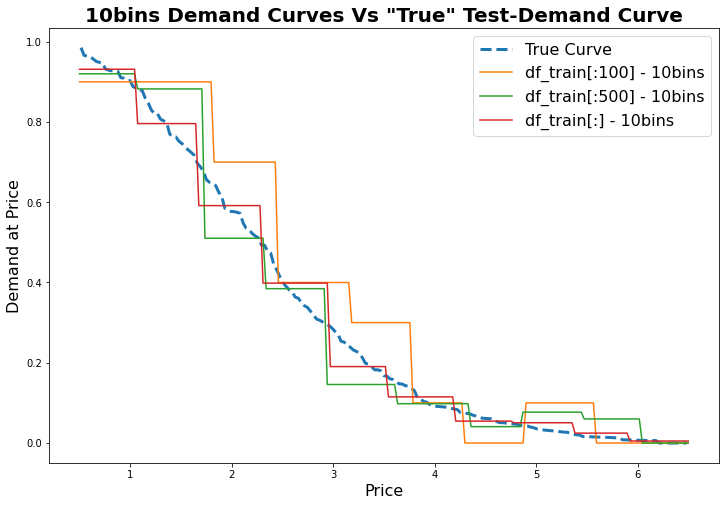

In [215]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plot_demand_curves(
    [prices_to_predict, prices_to_predict, prices_to_predict],
    [pred_demand_df1, pred_demand_df2, pred_demand_df3],
    test_demand_curve,
    ax,
    labels = ['df_train[:100] - 10bins', 'df_train[:500] - 10bins', 'df_train[:] - 10bins'],
    title = "10bins Demand Curves Vs \"True\" Test-Demand Curve",
    xlab = "Price",
    ylab = "Demand at Price" 
)

<font color='blue'> Do the same plot, except now you're using 50 bins for each of the three data frames.

In [216]:
nbins = 50

#### 1. the dataframe is the first 100 rows of df_train, with 50 bins

In [217]:
emp_df = create_empirical_estimate_demand_df(df1, nbins)
pred_demand_df1 = [get_prediction_empirical(emp_df, price) for price in prices_to_predict]

#### 2. the dataframe is the first 500 rows of df_train, with 50 bins.


In [218]:
emp_df = create_empirical_estimate_demand_df(df2, nbins)
pred_demand_df2 = [get_prediction_empirical(emp_df, price) for price in prices_to_predict]

#### 3. the dataframe is all the rows of df_train, with 50 bins.

In [219]:
emp_df = create_empirical_estimate_demand_df(df3, nbins)
pred_demand_df3 = [get_prediction_empirical(emp_df, price) for price in prices_to_predict]

#### 4. Plot

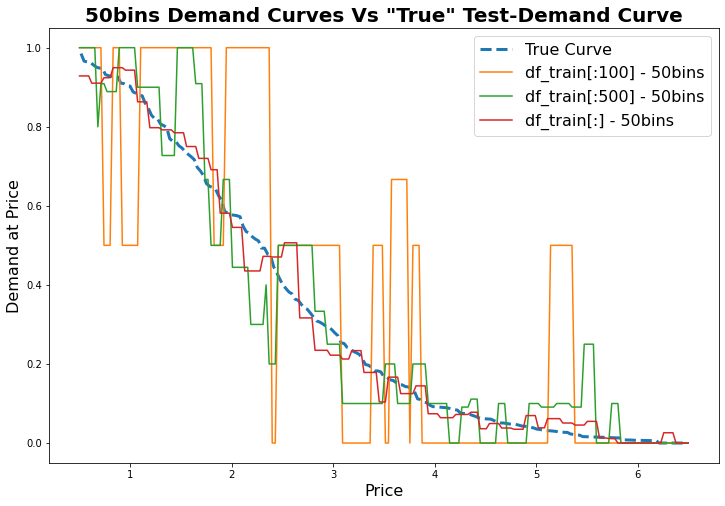

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plot_demand_curves(
    [prices_to_predict, prices_to_predict, prices_to_predict],
    [pred_demand_df1, pred_demand_df2, pred_demand_df3],
    test_demand_curve,
    ax,
    labels = ['df_train[:100] - 50bins', 'df_train[:500] - 50bins', 'df_train[:] - 50bins'],
    title = "50bins Demand Curves Vs \"True\" Test-Demand Curve",
    xlab = "Price",
    ylab = "Demand at Price"
)

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using more data and more bins?

Using more bins makes accounts for a more "dense" prediction since the steps in price are smaller, which ultimately outputs much better predictions (closer to the true curve in blue).

Using subsets of the data to generalize a prediction for the whole data clearly reduces the prediction, so it makes sense that the curve for df_train[:100] and df_train[:500] are significantly worse than the predictions made using all the training data.

### 1b) Demand estimation using logistic regression

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should just have two coefficients: one for the intercept, and one for the price. The function takes in a dataframe that you will use as your training data for your model, and should return your fitted model. 

In [221]:
from sklearn.linear_model import LogisticRegression
import numpy as np

df_train["Purchased"] = df_train["Purchased"].apply(lambda x: 1.0 if x == True else 0.0)


def fit_logistic_regression_demand_just_on_price(df):
    X = df["Offered price"]
    Y = df["Purchased"]
    logisticRegr = LogisticRegression()
    logisticRegr.fit(np.array(X).reshape(-1, 1), Y)
    return logisticRegr

<font color='blue'> Fill in the below function, that takes in a single price and your trained model and outputs the prediction for the demand $d(p)$ at that price.

Note that you do not want to treat logistic regression as a binary classifier that outputs either 0 or 1. Rather, you want to get the probability of being a 1. You can extract this using the predict_proba(X) function. 

In [222]:
def get_prediction_logistic(fitted_model, price):
    return fitted_model.predict_proba(np.array(price).reshape(-1, 1))[:, 1]
    

<font color='blue'> For each of the three training dataframes as in part A, fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function. Generate the same lineplot as above. Also include the "true" test-time demand curve, `test_demand_curve`. 

In [223]:
model_df1 = fit_logistic_regression_demand_just_on_price(df1)
ols_demand_df1 = get_prediction_logistic(model_df1, prices_to_predict)

model_df2 = fit_logistic_regression_demand_just_on_price(df2)
ols_demand_df2 = get_prediction_logistic(model_df2, prices_to_predict)

model_df3 = fit_logistic_regression_demand_just_on_price(df3)
ols_demand_df3 = get_prediction_logistic(model_df3, prices_to_predict)

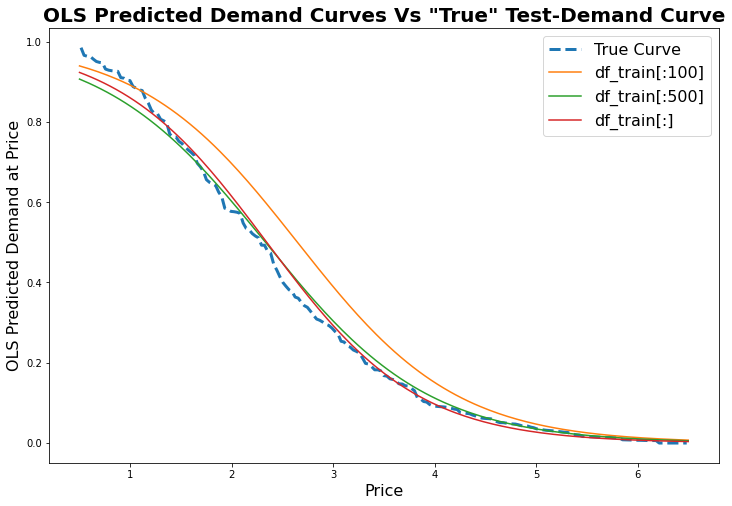

In [224]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plot_demand_curves(
    [prices_to_predict, prices_to_predict, prices_to_predict],
    [ols_demand_df1, ols_demand_df2, ols_demand_df3],
    test_demand_curve,
    ax,
    labels = ['df_train[:100]', 'df_train[:500]', 'df_train[:]'],
    title = "OLS Predicted Demand Curves Vs \"True\" Test-Demand Curve",
    xlab = "Price",
    ylab = "OLS Predicted Demand at Price"
)

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using logistic regression instead of the empirical distribution? 

While using a finite number of bins naturally generates a "step-wise" discrete prediction, using OLS results in a smooth continuous curve that closely follows the true test-demand curve.

As observed previously, using more training data results in a better prediction compared to the ones obtained using only 500 or 100 data points.

### 1c) Optimal pricing using your demand estimates

<font color='blue'> Fill in the following function that takes in two lists: a list of prices, and a list of predicted demand d(p) at that price. The function outputs the revenue maximizing price given the data and the corresponding revenue. You may use a "brute force" technique, that loops through all the possible prices and calculates the revenue using that price. 

In [225]:
def get_revenue_maximizing_price_and_revenue(price_options, demand_predictions):
    max_rev_idx = 0
    max_rev = 0
    for i, (price, demand) in enumerate(zip(price_options, demand_predictions)):
        curr_rev = price * demand
        if curr_rev > max_rev:
            max_rev_idx = i
            max_rev = curr_rev
    return price_options[max_rev_idx], max_rev

<font color='blue'> Print out the optimal price and the predicted optimal revenue from the predictions for your naive and logistic models, using 100 rows and all the data, each. 

For example, we got the following (your numbers may differ slightly):

logistic, 100 points:  2.580402010050251 1.2143341610705582

naive, all points:  2.278894472361809 1.348157868550674

In [226]:
df_opt_prices = pd.DataFrame(columns = ['Data Points', 'Method', 'Opt Price', 'Opt Revenue'])

for dp, method, demand in zip(["First 100", "First 100", "All", "All"], 
                          ["Naive", "OLS", "Naive", "OLS"], 
                          [pred_demand_df1, ols_demand_df1, pred_demand_df3, ols_demand_df3]):
    
    max_price, max_rev = get_revenue_maximizing_price_and_revenue(prices_to_predict, demand)
    
    df_opt_prices = df_opt_prices.append({
        'Data Points': dp,
        'Method': method,
        'Opt Price' : max_price,
        'Opt Revenue' : max_rev,
         }, ignore_index = True 
     )
    
display_sbs(df_opt_prices, titles = ['Optimal Prices and Revenues Summary'])

,Data Points,Method,Opt Price,Opt Revenue
0,First 100,Naive,5.354271,2.677136
1,First 100,OLS,2.188442,1.407088
2,All,Naive,2.640704,1.337500
3,All,OLS,1.977387,1.229548


<font color='blue'> Now, we're going to use the "true" test-time demand curve, `test_demand_curve`. For each of the above predicted optimal prices, calculate the revenue resulting from that price used on the true demand curve. Also print out the true optimal price and corresponding revenue for that curve.  

For example, we got:

true revenue using logistic 100 price:  0.9729384628058323

In [227]:
df_true_prices = pd.DataFrame(columns = ['True Opt Price', 'True Opt Revenue', 'Actual Revenue'])

    
opt_price, opt_rev = get_revenue_maximizing_price_and_revenue(test_demand_curve["Price_bin_right"],
                                                          test_demand_curve["Demand_at_price"])

for i, row in df_opt_prices.iterrows():
    current_max_price = row["Opt Price"]
    true_row = test_demand_curve[(test_demand_curve["Price_bin_left"] < current_max_price) &
                                 (test_demand_curve["Price_bin_right"] >= current_max_price)]
    
    actual_revenue = true_row["Demand_at_price"] * current_max_price
    
    df_true_prices = df_true_prices.append({
        'True Opt Price' : float(opt_price),
        'True Opt Revenue' : float(opt_rev),
        'Actual Revenue': float(actual_revenue),
         }, ignore_index = True 
     )


display_sbs(df_opt_prices, df_true_prices, 
        titles = ['Optimal Prices and Revenues Summary', 'Corresponding True Revenue'])

Optimal Prices and Revenues Summary 
 
 
 
 Data Points 
 Method 
 Opt Price 
 Opt Revenue 
 
 
 
 
 0 
 First 100 
 Naive 
 5.354271 
 2.677136 
 
 
 1 
 First 100 
 OLS 
 2.188442 
 1.407088 
 
 
 2 
 All 
 Naive 
 2.640704 
 1.337500 
 
 
 3 
 All 
 OLS 
 1.977387 
 1.229548 
 
 
 Corresponding True Revenue 
 
 
 
 True Opt Price 
 True Opt Revenue 
 Actual Revenue 
 
 
 
 
 0 
 2.098 
 1.200829 
 0.116397 
 
 
 1 
 2.098 
 1.200829 
 1.141796 
 
 
 2 
 2.098 
 1.200829 
 0.960256 
 
 
 3 
 2.098 
 1.200829 
 1.141311

<font color='blue'> How do your estimates compare to the actual revenue? Discuss in no more than 3 sentences. 

The estimates I obtained are lower than the true optimal revenue. 

While Naive seems to be very susceptible to the data provided, i.e. it gives completely wrong estimates for only the first 100 data points, OLS seems very robust, always predicting a revenue of 1.141.

Overall, OLS seems to be a much better prediction algorithm compared to Naive.

# Problem 2: Demand estimation and pricing with covariates 

Now, we are going to ask you to do personalized pricing, based on just a two binarized covariates. 

First, take `df_train` and create a new column for "low" and "high" wealth, based on if the income level is above or below the median income level. Second, create a new column for Location: `1` if the location is either America, and `0` if the location is anything else.

For this section, we will use all the df_train data, as opposed to just the first few rows.

#### Create Wealth and Location Column

In [228]:
med_income = df_train["Income"].median()

df_train["Location"] = df_train["Location"].apply(lambda x: 1 if x == "America" else 0)
df_train["Wealth"] = df_train["Income"].apply(lambda x: 1 if x >= med_income else 0)

df1, df2, df3 = df_train.iloc[:100, :], df_train.iloc[:500, :], df_train.iloc[:, :]

### 2a) Demand estimation

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should now have more coefficients than before: 1 for each covariate, and any interactions (including interactions between price and covariates) that you wish to add. If you add more interactions, you may wish to add regularization. 

In [229]:
def fit_logistic_regression_demand_with_covariates(df):
    X = df[["Location", "Wealth", "Offered price"]]
    Y = df["Purchased"]
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X, Y)
    return logisticRegr

<font color='blue'> Fill in the below function, that takes in a single price, covariates, and your trained model, and outputs the prediction for the demand $d(p)$ at that price. For example, one of the covariate inputs to the function can be `['NotAmerica', 'LowWealth']`.

In [230]:
def get_prediction_logistic(fitted_model, price, covariates):
    X = pd.DataFrame(columns = ['Location', 'Wealth', 'Offered price'])
    X['Offered price'] = price
    X['Location'] = 0 if 'NotAmerica' in covariates else 1
    X['Wealth'] = 0 if 'LowWealth' in covariates else 1    
        
    return fitted_model.predict_proba(X)[:, 1]

In [231]:
test_demand_curve_America_HighWealth = pd.read_csv('data/test_demand_America_HighWealth.csv')
test_demand_curve_NotAmerica_HighWealth = pd.read_csv('data/test_demand_NotAmerica_HighWealth.csv')
test_demand_curve_America_LowWealth = pd.read_csv('data/test_demand_America_LowWealth.csv')
test_demand_curve_NotAmerica_LowWealth = pd.read_csv('data/test_demand_NotAmerica_LowWealth.csv')

<font color='blue'> Fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function and each unique covariate combination.

For example, `test_demand_NotAmerica_LowWealth`, we got:

Group Not America, Low Wealth: Optimal price 1.314070, Revenue 0.913284, True revenue 0.788442


<font color='blue'> For each covariate combination, generate the same lineplot as in 1a and 1b (separately for each covariate combination). Also include the "true" test-time demand curve for the appropriate covariate combination 


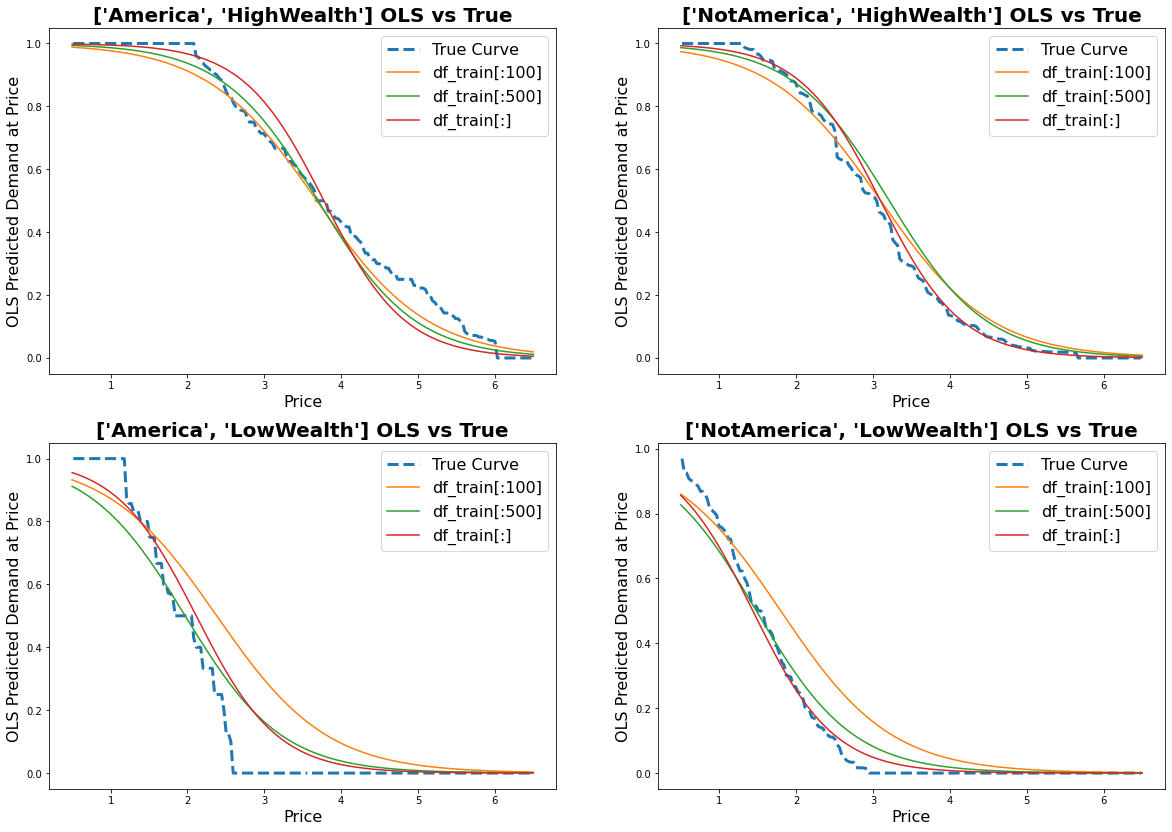

In [232]:
fig, ax = plt.subplots(2, 2, figsize=(20, 14))


df_true_prices_covariates = pd.DataFrame(
    columns = ['Cov1', 'Cov2', 'True Opt Price', 'True Opt Revenue', 'Actual Revenue'])

for i, (cov_pair, test_curve) in enumerate(zip(
    [['America', 'HighWealth'], ['NotAmerica', 'HighWealth'], 
     ['America', 'LowWealth'], ['NotAmerica', 'LowWealth']], 
    [test_demand_curve_America_HighWealth, test_demand_curve_NotAmerica_HighWealth, 
     test_demand_curve_America_LowWealth, test_demand_curve_NotAmerica_LowWealth])):
    
    model_2a_df1 = fit_logistic_regression_demand_with_covariates(df1)
    cov_pair_pred_df1 = get_prediction_logistic(model_2a_df1, prices_to_predict, cov_pair)
    
    model_2a_df2 = fit_logistic_regression_demand_with_covariates(df2)
    cov_pair_pred_df2 = get_prediction_logistic(model_2a_df2, prices_to_predict, cov_pair)

    model_2a_df3 = fit_logistic_regression_demand_with_covariates(df3)
    cov_pair_pred_df3 = get_prediction_logistic(model_2a_df3, prices_to_predict, cov_pair)
    
    ## Comput Optimal Price, Optimal Revenue and Actual Revenue
    current_opt_price, _ = get_revenue_maximizing_price_and_revenue(prices_to_predict, 
                                                                    cov_pair_pred_df3)
    opt_price, opt_rev = get_revenue_maximizing_price_and_revenue(test_curve["Price_bin_right"],
                                                                  test_curve["Demand_at_price"])
    true_row = test_demand_curve[(test_demand_curve["Price_bin_left"] < current_max_price) &
                                 (test_demand_curve["Price_bin_right"] >= current_max_price)]
    
    actual_revenue = true_row["Demand_at_price"] * current_opt_price
    
    df_true_prices_covariates = df_true_prices_covariates.append({
        'Cov1': cov_pair[0], 
        'Cov2': cov_pair[1],
        'True Opt Price' : float(opt_price),
        'True Opt Revenue' : float(opt_rev),
        'Actual Revenue': float(actual_revenue),
         }, ignore_index = True 
     )
    
    
    plot_demand_curves(
        [prices_to_predict, prices_to_predict, prices_to_predict],
        [cov_pair_pred_df1, cov_pair_pred_df2, cov_pair_pred_df3],
        test_curve,
        ax[int(i/2), int(i % 2)],
        labels = ['df_train[:100]', 'df_train[:500]', 'df_train[:]'],
        title = str(cov_pair) + " OLS vs True",
        xlab = "Price",
        ylab = "OLS Predicted Demand at Price"
    )

### 2b) Pricing

<font color='blue'> Now, use your code from 1c to output predicted optimal prices, predicted revenue, and and actual revenue using the test data curve, for each covariate combination. 

In [233]:
display_sbs(df_true_prices_covariates, 
        titles = ['Optimal Prices and Revenues Summary for Covariate Pairs'])

,Cov1,Cov2,True Opt Price,True Opt Revenue,Actual Revenue
0,America,HighWealth,3.274,2.182667,1.715591
1,NotAmerica,HighWealth,2.490,1.848636,1.402347
2,America,LowWealth,1.495,1.196000,0.984689
3,NotAmerica,LowWealth,1.163,0.838885,0.723652


<font color='blue'> Suppose each of the 4 covariate combinations make up an equal part of the population. What would be the resulting revenue achieved at test time if you use the optimal price for each group (so you look at their covariates, and then give them the optimal price for that group).

In [234]:
resulting_revenue = 0

for i, row in df_true_prices_covariates.iterrows():
    resulting_revenue += 0.25 * row["Actual Revenue"]

print("Resulting Revenue Achieved at Test Time: ", resulting_revenue)

Resulting Revenue Achieved at Test Time:  1.2065697615594753


<font color='blue'> Comment on your outputs in no more than 3 sentences. What is the effect of using different prices for differerent covariate groups?

Changing the price to "target" different covariate groups yields to a better revenue.

That is because some covariate groups are more tolerant to price oscillations than others, i.e. America-LowWealth that drops to a zero demand before price reaches 3 dollars, compared to NotAmerica-HighWealth that drops to zero demand almost at 6 dollars.

# Problem 3: Pricing under capacity constraints

Now, we are going to build up to implementing the Bellman equation approach discussed in class, to price a single copy of an item to be sold over $T$ time periods. For simplicity, we will use `test_demand_curve` as $d(p)$. 

In [235]:
price_options = list(test_demand_curve.Price_bin_mid)
demand_predictions = list(test_demand_curve.Demand_at_price)

### 3a) Implementing one step of the Bellman equation

Recall the "Bellman equation" taught in class. Suppose we have 1 copy of the item at time $t$. Then, my expected revenue given I price the item at $p_t$ is:
$$ V_t = d(p_t)p_t + (1 - d(p_t))V_{t+1}$$

<font color='blue'> Implement the following function that returns optimal price $p_t$ and the resulting value $V_t$, given the demand curve and $V_{t+1}$. 

For example, we find that the output of the following function call is: (2.083, 1.1922434210526316)

`get_single_step_revenue_maximizing_price_and_revenue(0, price_options, demand_predictions)`

In [236]:
def get_single_step_revenue_maximizing_price_and_revenue(Vtplus1, price_options, demand_predictions):
    max_Vt = 0
    max_pt = 0
    for pt, dpt in zip(reversed(price_options), reversed(demand_predictions)):
        Vt = (dpt * pt) + (1 - dpt) * Vtplus1

        if Vt > max_Vt:
            max_Vt = Vt
            max_pt = pt
    
    return max_pt, max_Vt

In [237]:
print(get_single_step_revenue_maximizing_price_and_revenue(0, price_options, demand_predictions))

(2.083, 1.1922434210526316)


### 3b) Calculating prices over time


<font color='blue'> Implement the following function that returns a list (of length $T$) of optimal prices for each time period, and a expected revenue number for those prices.
    
Hint: your function should loop through each time step, _starting_ at time $t=T-1$ (the last time period, since the first time period is time $t=0$). Each iteration of the loop should call the function from part 3a. Recall that we can define $V_T = 0$, since even if the item is unsold at time $T$, we have finished trying to sell it.

In [238]:
def get_prices_over_time_and_expected_revenue(prices, demand_predictions, T):
    Vt = 0
    opt_prices_exp_rev = [[0, 0]] * T
    for t in range(T-1, -1, -1):
        pt, Vt = get_single_step_revenue_maximizing_price_and_revenue(Vt, prices, demand_predictions)
        opt_prices_exp_rev[t] = [pt, Vt]
    return opt_prices_exp_rev

<font color='blue'> Plot a line plot for your optimal prices over time when $T=100$ and $T=10$. Also print out the expected revenue using these prices and for each $T$. 

For example, when $T=100$, we find that prices[0] = 5.822, prices[90] = 4.224, and that revenue = 5.2287

In [239]:
df_prices_T100 = pd.DataFrame(columns = ['t', 'Opt Price', 'Exp Revenue'])
df_prices_T10 = pd.DataFrame(columns = ['t', 'Opt Price', 'Exp Revenue'])

# T = 100
get_prices_T100 = get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 100)
for t, el in enumerate(get_prices_T100):
        
    df_prices_T100 = df_prices_T100.append({
        't' : str(t),
        'Opt Price' : float(el[0]),
        'Exp Revenue': float(el[1]),
         }, ignore_index = True 
    )

# T = 10
get_prices_T10 = get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 10)
for t, el in enumerate(get_prices_T10):
        
    df_prices_T10 = df_prices_T10.append({
        't' : str(t),
        'Opt Price' : float(el[0]),
        'Exp Revenue': float(el[1]),
         }, ignore_index = True 
    )

display_sbs(df_prices_T100, df_prices_T10, 
        titles = ['Optimal Prices and Revenues Summary', 'Corresponding True Revenue'])

,t,Opt Price,Exp Revenue
0,0,5.8220,5.228684
1,1,5.8220,5.220929
2,2,5.8220,5.213071
3,3,5.8220,5.205112
4,4,5.8220,5.197048
5,5,5.8220,5.188878
6,6,5.8220,5.180602
7,7,5.8220,5.172218
8,8,5.8220,5.163724
9,9,5.8220,5.155119


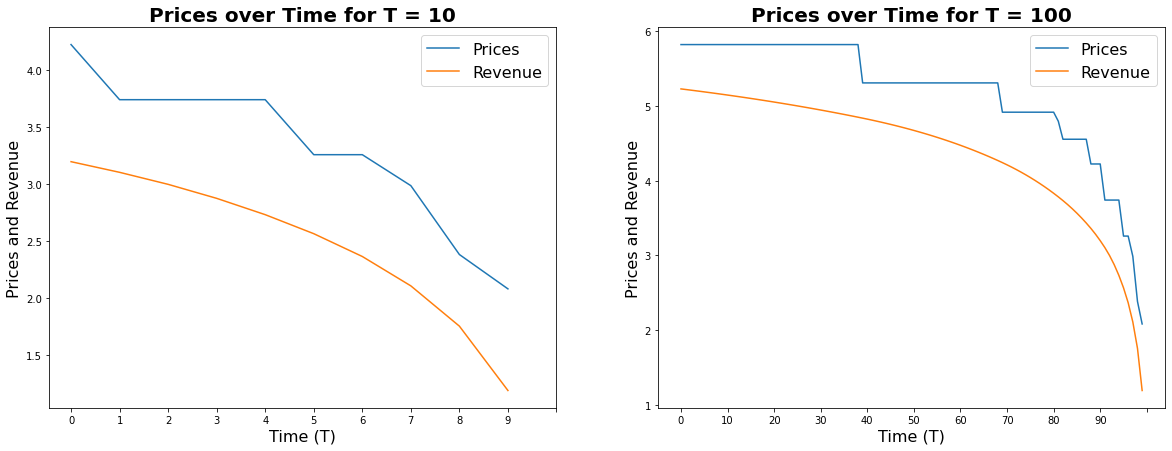

In [240]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
for i, df_prices in zip([0, 1], [df_prices_T10, df_prices_T100]):
    T = 10 + 90 * i
    ax[i].plot(df_prices["t"], df_prices["Opt Price"], label = 'Prices')
    ax[i].plot(df_prices["t"], df_prices["Exp Revenue"], label = 'Revenue')
    
    ax[i].set_xlabel('Time (T)',  fontsize = 16)
    ax[i].set_ylabel('Prices and Revenue',  fontsize = 16)
    ax[i].set_title('Prices over Time for T = ' + str(T),  fontsize = 20, fontweight="bold")
    ax[i].legend(fontsize = 16)
    ax[i].set_xticks(np.linspace(0, T, num = 11))


In [241]:
# For example, when  𝑇=100 , we find that prices[0] = 5.822, prices[90] = 4.224, and that revenue = 5.2287
df_tmp = df_prices_T100.iloc[[0, 90], :]
display(df_tmp)

,t,Opt Price,Exp Revenue
0,0,5.822,5.228684
90,90,4.224,3.197679


### 3c) [Bonus, 3 points] Prices over time with multiple copies

<font color='blue'> Now, suppose that you have $K$ copies of the item, that you must sell over a time period $T$. Implement the two-dimensional dynamic program as discussed in class. Plot a line plot where the X axis is time as in 3b, but now you have $K$ lines where each line indicates the price at time $T$ if you have $K$ items left. 
    
Hint: As in 3a and 3b, you may find it useful to first optimize the price $p_{t,k}$ given the values $V_{t+1, k}$, $V_{t+1, k-1}$. Then, have a 2nd function that loops through $t, k$ in an appropriate order. 

In [242]:
def get_single_step_revenue_maximizing_price_and_revenue_k(Vtplus1k, Vtplus1kminus1, 
                                                           price_options, demand_predictions):
    max_Vt = 0
    max_pt = 0
    for ptk, dptk in zip(reversed(price_options), reversed(demand_predictions)):
        Vt = dptk * (ptk + Vtplus1kminus1) + (1 - dptk) * Vtplus1k

        if Vt > max_Vt:
            max_Vt = Vt
            max_pt = ptk
    
    return max_pt, max_Vt

In [243]:
def get_prices_over_time_and_expected_revenue_k(prices, demand_predictions, T, K):
    Vt = 0
    Vt_kminus1 = 0
    opt_prices = np.zeros((K, T))
    exp_rev = np.zeros((K, T))
    for k in range(K): 
        for t in range(T-1, -1, -1):
            pt, Vt = get_single_step_revenue_maximizing_price_and_revenue_k(Vt, Vt_kminus1,
                                                                            prices, demand_predictions)
            
            Vt_kminus1 = exp_rev[k-1, t] if k > 0 else 0
            opt_prices[k, t] = pt
            exp_rev[k, t] = Vt
        
    return opt_prices, exp_rev

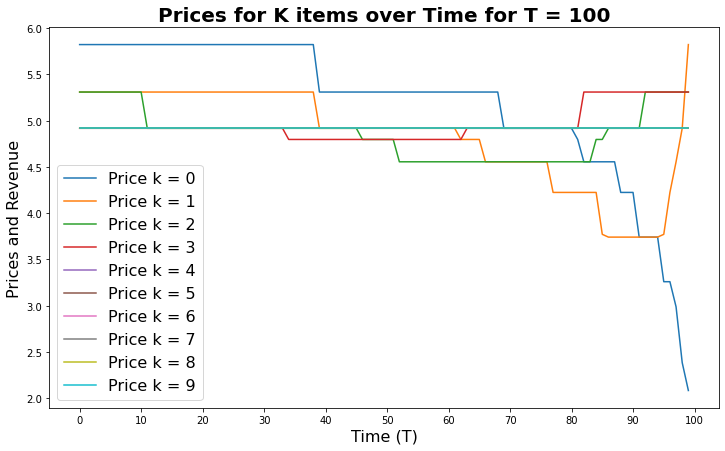

In [244]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

T = 100
K = 10
opt_prices, exp_rev = get_prices_over_time_and_expected_revenue_k(price_options, demand_predictions, T, K)    
    
for i in range(K):
    ax.plot(range(T), opt_prices[i, :], label = 'Price k = ' + str(i))
    
ax.set_xlabel('Time (T)',  fontsize = 16)
ax.set_ylabel('Prices and Revenue',  fontsize = 16)
ax.set_title('Prices for K items over Time for T = ' + str(T),  fontsize = 20, fontweight="bold")
ax.legend(fontsize = 16)
ax.set_xticks(np.linspace(0, T, num = 11))
plt.show()